# Recipe Review Analysis 
## Part I: Introduction and Exploratory Data Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chillyssa/NLP-with-Deep-Learning-Project/blob/main/project_part1.ipynb)

## Introduction 

### Motivation 

As a foodie and avid home chef I am always searching for new recipes to try out to expand my repertoire! The problem I face when turning to the internet to look for a recipe is the vast amount information available online. There are many professional websites as well as personal blogs both of which have their own subset of seemingly countless recipes, including different variations of the virtually the same dish. Each recipe then has a set of reviews and it's baffling to sift through the reviews of each recipe to determine whether or not I should ultimately test out the dish. I need a tool or method to quickly analyze a set of recipe reviews and give me some insight on the reviews and potentially the underlying reason why the recipe is reccomended or not. Enter natural language processing and sentiment analysis!

### Objective

Luckily data is everywhere today, including the food world. The intention of this project is to harness the power of natural language processing by way of sentiment analysis to examine a set of [recipe review data](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions) from Food.com's online recipe generator. This data set comes from Kaggle and was originally gathered for the below cited research. 

Generating Personalized Recipes from Historical User Preferences
Bodhisattwa Prasad Majumder*, Shuyang Li*, Jianmo Ni, Julian McAuley
EMNLP, 2019
https://www.aclweb.org/anthology/D19-1613/

## Exploratory Data Analysis

### Loading Data
First up we will load in the data! the data provided comes with a few different sets. For sentiment analysis I will explore the RAW_interactions.csv file which includes the recipe reviews as they were written by the users. 


In [6]:
# mount google drive to import data files - only have to run this once. 
# from google.colab import drive
# drive.mount('/content/drive')

# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 0)
path = '/content/drive/MyDrive/NLP-F22/data/RAW_interactions.csv'
df = pd.read_csv(path)
df.head(10)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo.
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I followed this procedure with strawberries instead of raspberries. Perhaps this is the reason it did not work well. Sorry to report that the strawberries I did in August were moldy in October. They were stored in my downstairs fridge, which is very cold and infrequently opened. Delicious and fresh-tasting prior to that, though. So, keep a sharp eye on them. Personally I would not keep them longer than a month. This recipe also appears as #120345 posted in July 2009, which is when I tried it. I also own the Edna Lewis cookbook in which this appears."
7,2000192946,120345,2015-05-10,2,"This recipe was OVERLY too sweet. I would start out with 1/3 or 1/4 cup of sugar and jsut add on from there. Just 2 cups was way too much and I had to go back to the grocery store to buy more raspberries because it made so much mix. Overall, I would but the long narrow box or raspberries. Its a perfect fit for the recipe plus a little extra. I was not impressed with this recipe. It was exceptionally over-sweet. If you make this simple recipe, MAKE SURE TO ADD LESS SUGAR!"
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


After the data is loaded in and we take a look at the first few rows we see that there are 5 columns(features) coming from the data: 

```
user_id, recipe_id, date, rating, review 
```
I'm going to add a couple of extra features to the data that will be useful for ananalyzing the data later. I will add a feature that coundts the characters in a review, the words in a review, and another column that will hold our preprocessed review(which will be discussed in a bit). After adding these, there will be 8 features as follows: 
```
user_id, recipe_id, date, rating, review, review_len, word_count, p_review
```


In [7]:
# Adding features for later analysis 
df['review_len'] = df['review'].astype(str).apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df['p_review'] = df['review'].astype(str)
df.head()

,user_id,recipe_id,date,rating,review,review_len,word_count,p_review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,138,27,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",205,31,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,99,19,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.,68,13,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",73,12,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"



Before diving deeper into the reviews, I will just look at some other values about the data set as a whole. I first will make sure the data doesn't have any null cells where there should be a review. Since this data is a set specifically for reviews, it is unlikely we will have any null review attributes, but this will make sure of that. 

In [8]:
# Remove any null review rows 
df = df[~df["review"].isnull()]

# Rows of data 
print('Individual Recipe Reviews: ' + str(len(df)))

# Reviews of each recipe 
recipe_count = df['recipe_id'].value_counts()
print('Review Counts by Recipe:')
print(recipe_count)


Individual Recipe Reviews: 1132198
Review Counts by Recipe:
2886      1609
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
155682    1   
154055    1   
252960    1   
144013    1   
386618    1   
Name: recipe_id, Length: 231630, dtype: int64


From this query I can see that there are 1,132,367 reviews in this data set! The largest amount of reviews a single recipe has is 1,613, however, looking at the summary of reviews by recipe, there seem to be several with a low review count. For this expirment I am going to only look at recipes that have between 100 and 150 reviews, inclusive.  

In [10]:
df = df[df.groupby('recipe_id')["recipe_id"].transform('size') >= 100]
df = df[df.groupby('recipe_id')["recipe_id"].transform('size') <= 150]
# Rows of data 
print('Individual Recipe Reviews: ' + str(len(df)))

# Reviews of each recipe 
recipe_count = df['recipe_id'].value_counts()
print('Review Counts by Recipe:')
print(recipe_count)

Individual Recipe Reviews: 48625
Review Counts by Recipe:
96475     150
79308     150
96514     150
71109     150
87864     149
         ... 
128679    100
53876     100
45609     100
148007    100
26451     100
Name: recipe_id, Length: 400, dtype: int64


Now the data is 400 unique recipes all with 100-150 reviews giving a total of 48,625 reviews. Let's take a look at a few of the reviews to see what our actual text data looks like right now. I have chosen 5 reviews at random all from different recipes just to see what kind of text we are dealing with. 

## Preprocessing 

Our data set is currently in it's raw form, that is, straight from the source. That means that all these reviews are in a form that has punctuation, capitalization, potential mispellings, etc. It's the _'Wild West'_ of textual data that a machine learning model will not know how to interpret. We need to take a few steps to clean up or preprocess the reviews to convert it into data that a model can analyze and predict the sentiment behind the review. 

A good first step is to make sure that we are working with the same data type for all reviews. It is likely that these are all text strings anyway, but in the event they are not, this will ensure all review data is of type string.  Additionally, several review entries have emoji like text and punctuation that, to the human eye can be inferred as emotion, but it isn't beneficial for text sentiment analysis so I will also remove all special characters and punctuation. The last thing I will do is convert all text to lower case to standardize the data even further. 



In [ ]:
import re 

# Convert all review data to stype string 
df['p_review'] = df['p_review'].astype(str)

# Remove Special Characters 
def clean(txt):
    txt = txt.str.replace(':-\)','')
    txt = txt.str.replace('(<a).*(>).*()', '')
    txt = txt.str.replace('(\xa0)', ' ')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('!','')
    txt = txt.str.replace('?','')
    txt = txt.str.replace('.','')
    txt = txt.str.replace(',','')
    txt = txt.str.replace(';','')
    txt = txt.str.replace(':','')
    txt = txt.str.replace('\'','')
    txt = txt.str.replace(':-\(','')
    txt = txt.str.replace(':\)','')
    txt = txt.str.replace(':\(','')
    return txt

df['p_review'] = clean(df['p_review'])
df['p_review'] = df['p_review'].str.replace('[^\w\s]', '') 

# Convert all text to lower case
df['p_review'] = df['p_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df.head()

Now that we have cleaned up the data a bit, let's look at those random reviews again to see what our reviews look like now. 

In [12]:
df.iloc[[9,777,16052,24300,43571]]

,user_id,recipe_id,date,rating,review,review_len,word_count,p_review
1417,58439,135585,2006-09-23,4,"This was TERRIFIC too!\r\nNo mucking around with frying wings too!\r\nUsed Chilli Hot Sauce for quite the ZING!\r\nFor those who appreciate authentic Buffalo wings, this is the THING!",177,30,this was terrific too no mucking around with frying wings too used chilli hot sauce for quite the zing for those who appreciate authentic buffalo wings this is the thing
12676,710809,14569,2009-09-05,0,"I thought this saying may be helpful regarding how many strawberries in a pint ""A pint's a pound the world around"". Some will disagree but this is my story and I am sticking to it.",180,35,i thought this saying may be helpful regarding how many strawberries in a pint a pints a pound the world around some will disagree but this is my story and i am sticking to it
347963,83093,44133,2006-05-01,5,"When I read the list of ingredients, I was skeptical but I forged ahead. I needed a large, make ahead side dish for a brisket cookout & this fit the bill. The bowl was clean in no time. Thanks for sharing.",207,41,when i read the list of ingredients i was skeptical but i forged ahead i needed a large make ahead side dish for a brisket cookout this fit the bill the bowl was clean in no time thanks for sharing
544768,1098866,45006,2012-12-14,5,"Delicious and easy to make. I mixed the water, yeast and brown sugar together and let it sit for 5 minutes. Then mixed the flour in using my Kitchenaid. Let it sit for about 30 minutes on top of the cold stove while brownies baked in the oven. The dough was easy to work with and cooked up easy. I used 4 cups of all-purpose flour.",336,66,delicious and easy to make i mixed the water yeast and brown sugar together and let it sit for 5 minutes then mixed the flour in using my kitchenaid let it sit for about 30 minutes on top of the cold stove while brownies baked in the oven the dough was easy to work with and cooked up easy i used 4 cups of allpurpose flour
1052023,163241,30165,2008-09-08,5,"This recipes has certainly come in handy with school starting and with my husband's work schedule. I've used just the basic recipe without all the extras and the fam loves them. I just made another batch yesterday, freezing half of them. Thanks Tish for all your great ideas.",278,48,this recipes has certainly come in handy with school starting and with my husbands work schedule ive used just the basic recipe without all the extras and the fam loves them i just made another batch yesterday freezing half of them thanks tish for all your great ideas


Next up I am going to remove some of the words in the reviews that aren't benficial for sentiment analysis. This will include all of the words that appear in human language frequently like 'but', 'is', 'the', etc.; these are what are known as stop words. I will also look at the frequency of each word and see how many times unique words were used. We can safely omit words that were used only once - these will likely be misspellings, typos, units for ingredients, and perhaps quantities. 

In [ ]:
# Removing stop words 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df['p_review'] = df['p_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

In [14]:
# Reviewing and Removing infrequent words 
freq = pd.Series(' '.join(df['p_review']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
print("Total words in all reviews: " + str(len(freq)))
print("Total words in list of one word used: " + str(len(less_freq)))
print(less_freq[:10])

df['p_review'] = df['p_review'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))


Total words in all reviews: 38290
Total words in list of one word used: 23074
['quailty', 'blogger', 'copykat', 'creaminessflavor', 'messily', '1050', 'freezerbrthis', 'curing', 'iemon', 'ingredientssteps']


Now that we have removed the infrequent words that won't help us in sentiment analysis, we want to convert all the words into their root form make our training model more efficient. Stemming and lemmatization are both processes that will take any inflected form of a word and modify it to use the root form. 

In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
st = PorterStemmer()

df['p_review'] = df['p_review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['p_review'] = df['p_review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

#Remove any punctuation added by stemming/lemmatization split
df['p_review'] = df['p_review'].str.replace('[^\w\s]', '')

df.iloc[[9,777,16052,24300,43571]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


,user_id,recipe_id,date,rating,review,review_len,word_count,p_review
1417,58439,135585,2006-09-23,4,"This was TERRIFIC too!\r\nNo mucking around with frying wings too!\r\nUsed Chilli Hot Sauce for quite the ZING!\r\nFor those who appreciate authentic Buffalo wings, this is the THING!",177,30,terrif around fri wing use chilli hot sauc quit zing appreci authent buffalo wing thing
12676,710809,14569,2009-09-05,0,"I thought this saying may be helpful regarding how many strawberries in a pint ""A pint's a pound the world around"". Some will disagree but this is my story and I am sticking to it.",180,35,thought say may help regard mani strawberri pint pint pound world around disagr stori stick
347963,83093,44133,2006-05-01,5,"When I read the list of ingredients, I was skeptical but I forged ahead. I needed a large, make ahead side dish for a brisket cookout & this fit the bill. The bowl was clean in no time. Thanks for sharing.",207,41,read list ingredi skeptic forg ahead need larg make ahead side dish brisket cookout fit bill bowl clean time thank share
544768,1098866,45006,2012-12-14,5,"Delicious and easy to make. I mixed the water, yeast and brown sugar together and let it sit for 5 minutes. Then mixed the flour in using my Kitchenaid. Let it sit for about 30 minutes on top of the cold stove while brownies baked in the oven. The dough was easy to work with and cooked up easy. I used 4 cups of all-purpose flour.",336,66,delici easi make mix water yeast brown sugar togeth let sit 5 minut mix flour use kitchenaid let sit 30 minut top cold stove browni bake oven dough easi work cook easi use 4 cup allpurpo flour
1052023,163241,30165,2008-09-08,5,"This recipes has certainly come in handy with school starting and with my husband's work schedule. I've used just the basic recipe without all the extras and the fam loves them. I just made another batch yesterday, freezing half of them. Thanks Tish for all your great ideas.",278,48,recip certainli come handi school start husband work schedul ive use basic recip without extra fam love made anoth batch yesterday freez half thank tish great idea


## Data Analysis 

After cleaning the reviews we can now turn to the analysis of the data! Real quick let's get a visualisaztion of our words in a word cloud for some aesthetic data! 

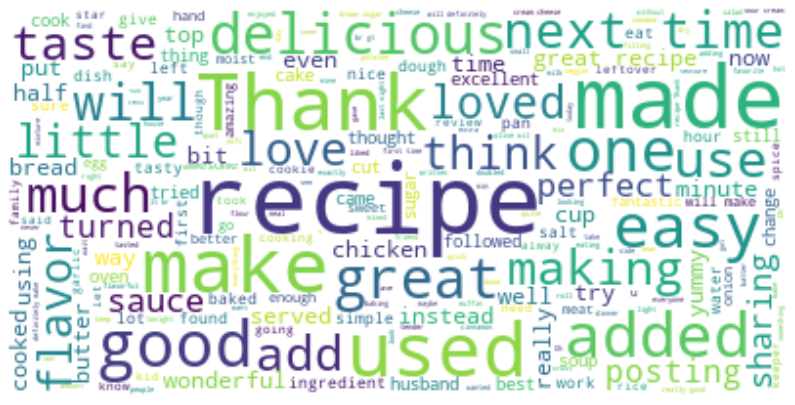

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(r for r in df.review)
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

Isn't that fun!? But doesn't necessarily tell us anything...

We can add another feature to our data set called polarity. Polarity will count the negative and postiive words within a review which will give us some quantified insight on the sentiment of text. The polarity values range from [-1,1] where -1 is negative, 1 is positive, and 0 is neutral. 

In [76]:
from textblob import TextBlob
df['polarity'] = df['p_review'].map(lambda text: TextBlob(text).sentiment.polarity)

df.head()

,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,polarity
1257,2002084345,9054,2018-03-30,1,Mush,4,1,mush,0.000000
1408,107135,135585,2006-04-02,5,i love buffulo wings and this makes it easy,45,9,love wing make easi,0.500000
1409,53932,135585,2006-04-10,5,This is a lower calorie and neater way to enjoy Buffalo chicken. Loved the sauce. Thanks for sharing the recipe.,114,20,lower calori neater way enjoy buffalo chicken love sauc thank share recip,0.100000
1410,33159,135585,2006-04-23,5,"Very satisfying & flavourful way to do chicken - tasted just like wings! I browned the chicken on the Foreman Grill. I think next time, I will double the sauce so the chicken ends up saucier. We don't care for blue cheese dressing so I just served with roasted potatoes & they were great!",291,54,satisfi flavour way chicken tast like wing brown chicken foreman grill think next time doubl sauc chicken end saucier dont care blue chee dress serv roast potato great,-0.166667
1411,60260,135585,2006-04-26,5,Everyone loved this chicken! I used Frank's Hot sauce and made the recipe as is. I was leary of the vinegar but it worked well and I liked the addition of the celery seeds. We made ours into Buffalo Chicken sandwiches - yum! Next time I might make just a little more sauce to add after the chicken is cooked. We are wing lovers and this sure makes getting that taste easy.,374,72,everyon love chicken use frank hot sauc made recip leari vinegar work well like addit celeri seed made buffalo chicken sandwich yum next time might make littl sauc add chicken cook wing lover sure make get tast easi,-0.078571


Next we look at the distibution of the Review length, Word count and the Polarity. 

Reviews with positive polarity:	39265
Reviews with negative polarity:	4365
Reviews with neutral polarity:	4995


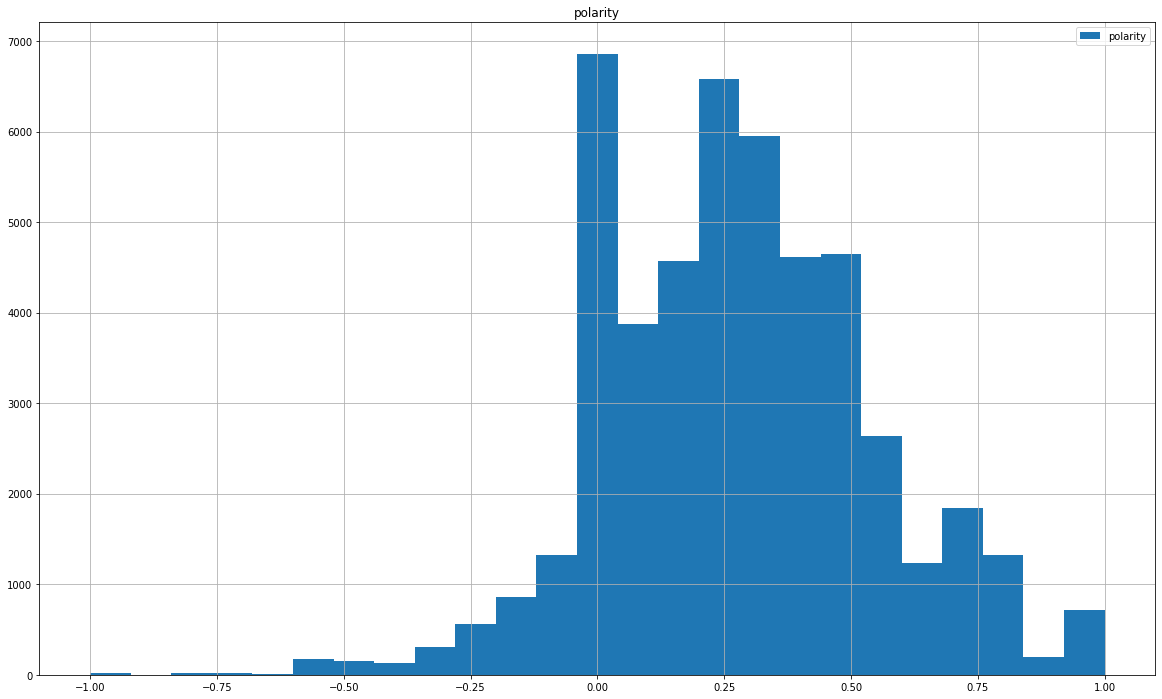

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

df[["polarity"]].hist(bins=25, figsize=(20, 12), legend=True)

pos_polarity = df.loc[df.polarity > 0, ['p_review']].values
print('Reviews with positive polarity:\t' + str(len(pos_polarity)))

neg_polarity = df.loc[df.polarity < 0, ['p_review']].values
print('Reviews with negative polarity:\t' + str(len(neg_polarity)))

neut_polarity = df.loc[df.polarity == 0, ['p_review']].values
print('Reviews with neutral polarity:\t' + str(len(neut_polarity)))

Looking at our polarity the data are skewed heavily to the right and have a somewhat normal looking distribution with the exception of the polarity right around 0. The majority of the polarity is above 0 which means that a majority of the reviews have a positive sentiment which we can also see from the output of the positive, negative, and neutral counts above the histogram.

Notice that we do have access to the actual rating of the recipe within our data set. Looking at the mean of the polarity grouped by the ratings it seems that our mean is above 0 for all ratings, which matches our histogram. It's interesting that our 0 rating has a relatively high mean where 0 would typically represent a -1 for the lowest polarity score. Knowing how users tend to act toward leaving reviews, It might be beneficial to drop the reviews in our data set with a 0 rating to have a more realistic rating scale. I will leave this for discussion in part 2. 

In [67]:
pol_mean = df.groupby('rating')['polarity'].agg([np.mean])
pol_mean.columns = ['mean_polarity']
pol_mean

,mean_polarity
rating,
0,0.218713
1,0.060615
2,0.128449
3,0.199446
4,0.264199
5,0.291731


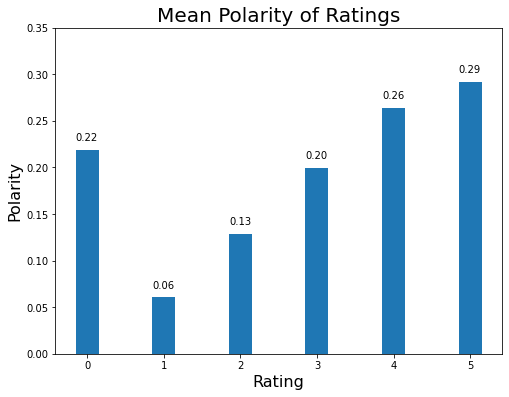

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(pol_mean.index, pol_mean.mean_polarity, width=0.3)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))

plt.title("Mean Polarity of Ratings", fontsize=20)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

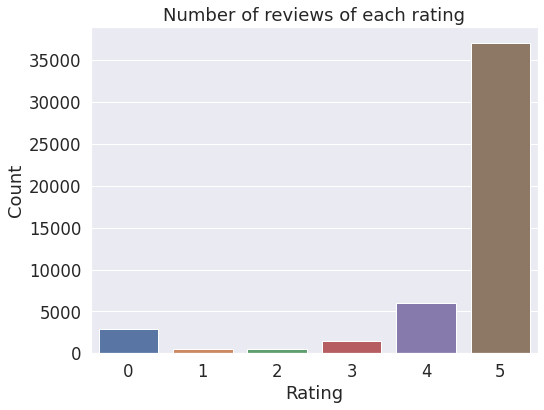

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of reviews of each rating")
plt.show()

This is showing that there are a high amount of 5 star reviews. At this point I am going to back up and look at the ratings/review counts for the whole data set before preceding with a smaller subset of the data to get a better distribution hopefully. 
